In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv('mall.csv')

In [17]:
print(data.isnull().sum()) #check null in any (method) columns

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [18]:
data.describe() #research statistic of data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:>

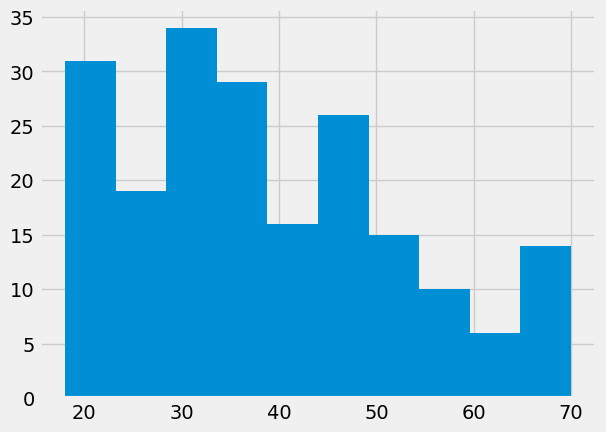

In [19]:
#Visualizations, to check data:

data['Age'].hist() #visual Age via Matplot

<AxesSubplot:>

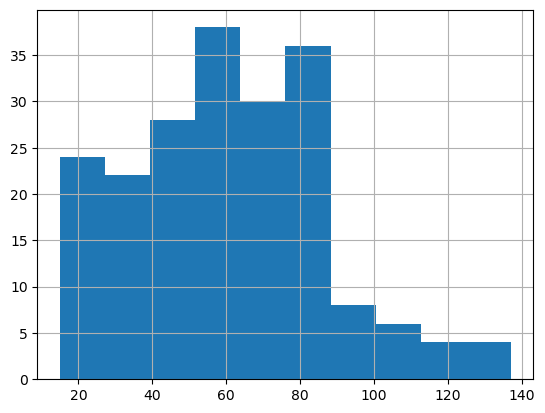

In [5]:
data['Annual Income (k$)'].hist()

<AxesSubplot:>

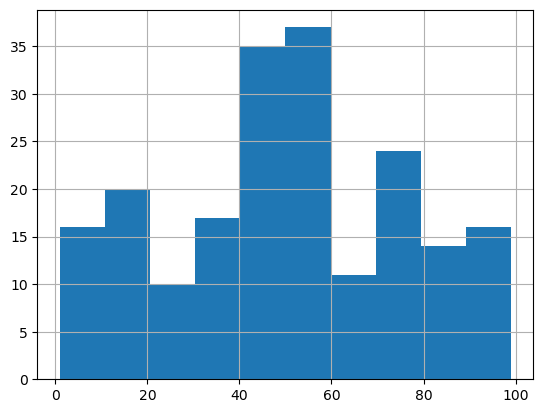

In [6]:
data['Spending Score (1-100)'].hist()

In [31]:
x = data.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values #Cluster

In [32]:
#Graph Spending score/Annual Income: 

from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++').fit(x)
    wcss.append(kmeans.inertia_)

In [33]:
import matplotlib.pyplot as plt

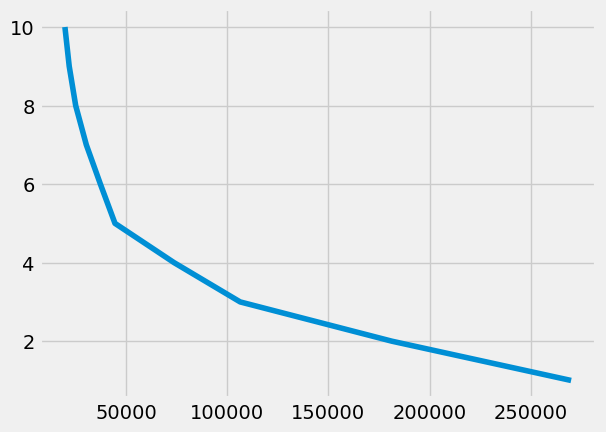

In [34]:
plt.plot(wcss, range(1,11))

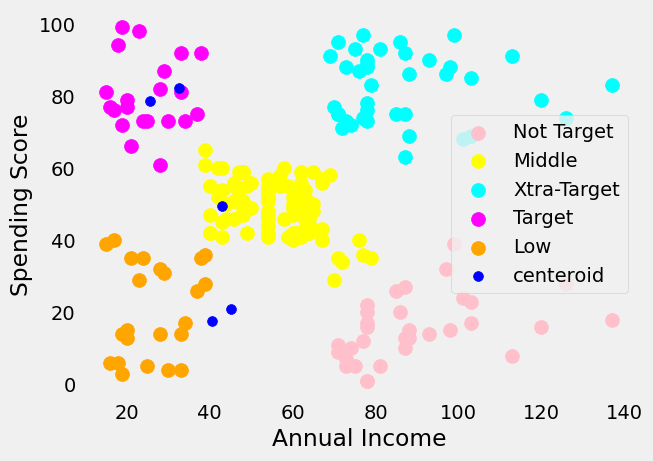

In [35]:
#Clustering:

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'Not Target')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Middle')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Xtra-Target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Target')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'Low')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

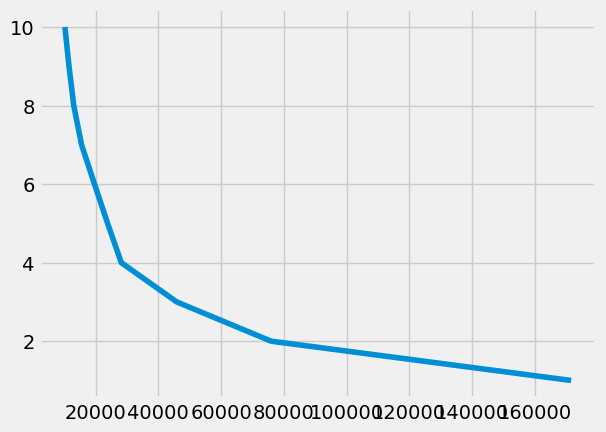

In [36]:
#Graph Age/Spending Score

x = data.loc[:, ['Age', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++').fit(x)
    
    wcss.append(kmeans.inertia_)
plt.plot(wcss, range(1,11))

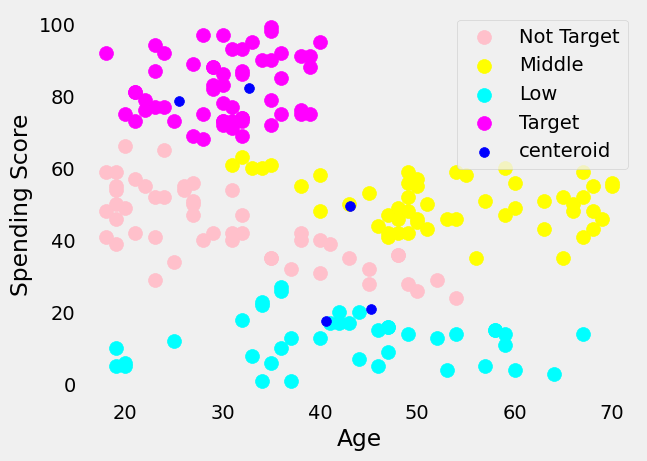

In [38]:
#Next clustering - Age/Spending Score:

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'Not Target')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Middle')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Low')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Target')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [39]:
#3d hist:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

x = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending Score (1-100)'],
    z= data['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)